# DNS (Thermospheric density)

In [1]:
SERVER_URL = "https://vires.services/ows"

In [2]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib,cartopy

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.12.0
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2
cartopy    : 0.22.0



In [3]:
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from viresclient import SwarmRequest

## Product information

Thermospheric density products are available through the following collections, both from Swarm, and from other spacecraft (via the [TOLEOS project](https://earth.esa.int/eogateway/activities/toleos))

- Thermospheric density derived from Swarm A, B, C (using the accelerometer):  
  [`SW_OPER_DNSxACC_2_`](https://swarmhandbook.earth.esa.int/catalogue/SW_DNSxACC_2_)
- Thermospheric density derived from Swarm A, B, C (using only the orbit determination):  
  [`SW_OPER_DNSxPOD_2_`](https://swarmhandbook.earth.esa.int/catalogue/SW_DNSxPOD_2_)
- CHAMP:  
  [`CH_OPER_DNS_ACC_2_`](https://swarmhandbook.earth.esa.int/catalogue/CH_DNS_ACC_2_)
- GRACE 1 & 2:  
  [`GR_OPER_DNSxACC_2_`](https://swarmhandbook.earth.esa.int/catalogue/GR_DNSxACC_2_)
- GRACE-FO 1:  
  [`GF_OPER_DNSxACC_2_`](https://swarmhandbook.earth.esa.int/catalogue/GF_DNSxACC_2_)

We can check the available parameter names with:

In [4]:
request = SwarmRequest(SERVER_URL)
for collection in ("SW_OPER_DNSAACC_2_", "SW_OPER_DNSAPOD_2_", "CH_OPER_DNS_ACC_2_", "GR_OPER_DNS1ACC_2_", "GF_OPER_DNS1ACC_2_"):
    print(f"{collection}:\n{request.available_measurements(collection)}\n")

SW_OPER_DNSAACC_2_:
['Height_GD', 'Latitude_GD', 'Longitude_GD', 'Height_GD', 'density', 'local_solar_time']

SW_OPER_DNSAPOD_2_:
['Height_GD', 'Latitude_GD', 'Longitude_GD', 'Height_GD', 'local_solar_time', 'density', 'density_orbitmean', 'validity_flag']

CH_OPER_DNS_ACC_2_:
['Height_GD', 'Latitude_GD', 'Longitude_GD', 'density', 'density_orbitmean', 'local_solar_time', 'validity_flag', 'validity_flag_orbitmean']

GR_OPER_DNS1ACC_2_:
['Height_GD', 'Latitude_GD', 'Longitude_GD', 'density', 'density_orbitmean', 'local_solar_time', 'validity_flag', 'validity_flag_orbitmean']

GF_OPER_DNS1ACC_2_:
['Height_GD', 'Latitude_GD', 'Longitude_GD', 'density', 'density_orbitmean', 'local_solar_time', 'validity_flag', 'validity_flag_orbitmean']



We can check for available time windows with:

In [5]:
request.available_times("SW_OPER_DNSAPOD_2_")

starttime                          endtime  \
0    2013-11-28 00:00:00+00:00 2013-11-28 23:59:30.001000+00:00   
1    2013-11-29 00:00:00+00:00 2013-11-29 23:59:30.001000+00:00   
2    2013-11-30 00:00:00+00:00 2013-11-30 23:59:30.001000+00:00   
3    2013-12-01 00:00:00+00:00 2013-12-01 23:59:30.001000+00:00   
4    2013-12-02 00:00:00+00:00 2013-12-02 23:59:30.001000+00:00   
...                        ...                              ...   
3850 2024-07-27 00:00:00+00:00 2024-07-27 23:59:30.001000+00:00   
3851 2024-07-28 00:00:00+00:00 2024-07-28 23:59:30.001000+00:00   
3852 2024-07-29 00:00:00+00:00 2024-07-29 23:59:30.001000+00:00   
3853 2024-07-30 00:00:00+00:00 2024-07-30 23:59:30.001000+00:00   
3854 2024-07-31 00:00:00+00:00 2024-07-31 23:59:30.001000+00:00   

                   bbox                                         identifier  
0     (-90,-180,90,180)  SW_OPER_DNSAPOD_2__20131128T000000_20131128T23...  
1     (-90,-180,90,180)  SW_OPER_DNSAPOD_2__20131129T000000_20131129T23...  
2     (-90,-180,90,180)  SW_OPER_DNSAPOD_2__20131130T000000_20131130T23...  
3     (-90,-180,90,180)  SW_OPER_DNSAPOD_2__20131201T000000_20131201T23...  
4     (-90,-180,90,180)  SW_OPER_DNSAPOD_2__20131202T000000_20131202T23...  
...                 ...                                                ...  
3850  (-90,-180,90,180)  SW_OPER_DNSAPOD_2__20240727T000000_20240727T23...  
3851  (-90,-180,90,180)  SW_OPER_DNSAPOD_2__20240728T000000_20240728T23...  
3852  (-90,-180,90,180)  SW_OPER_DNSAPOD_2__20240729T000000_20240729T23...  
3853  (-90,-180,90,180)  SW_OPER_DNSAPOD_2__20240730T000000_20240730T23...  
3854  (-90,-180,90,180)  SW_OPER_DNSAPOD_2__20240731T000000_20240731T23...  

[3855 rows x 4 columns]

In [6]:
request.available_times("GF_OPER_DNS1ACC_2_")

starttime                          endtime  \
0    2018-05-29 00:00:00+00:00 2018-05-29 23:59:50.001000+00:00   
1    2018-05-30 00:00:00+00:00 2018-05-30 23:59:50.001000+00:00   
2    2018-05-31 00:00:00+00:00 2018-05-31 23:59:50.001000+00:00   
3    2018-06-01 00:00:00+00:00 2018-06-01 23:59:50.001000+00:00   
4    2018-06-02 00:00:00+00:00 2018-06-02 23:59:50.001000+00:00   
...                        ...                              ...   
2183 2024-05-27 00:00:00+00:00 2024-05-27 23:59:50.001000+00:00   
2184 2024-05-28 00:00:00+00:00 2024-05-28 23:59:50.001000+00:00   
2185 2024-05-29 00:00:00+00:00 2024-05-29 23:59:50.001000+00:00   
2186 2024-05-30 00:00:00+00:00 2024-05-30 23:59:50.001000+00:00   
2187 2024-05-31 00:00:00+00:00 2024-05-31 23:59:50.001000+00:00   

                   bbox                                         identifier  
0     (-90,-180,90,180)  GF_OPER_DNS1ACC_2__20180529T000000_20180529T23...  
1     (-90,-180,90,180)  GF_OPER_DNS1ACC_2__20180530T000000_20180530T23...  
2     (-90,-180,90,180)  GF_OPER_DNS1ACC_2__20180531T000000_20180531T23...  
3     (-90,-180,90,180)  GF_OPER_DNS1ACC_2__20180601T000000_20180601T23...  
4     (-90,-180,90,180)  GF_OPER_DNS1ACC_2__20180602T000000_20180602T23...  
...                 ...                                                ...  
2183  (-90,-180,90,180)  GF_OPER_DNS1ACC_2__20240527T000000_20240527T23...  
2184  (-90,-180,90,180)  GF_OPER_DNS1ACC_2__20240528T000000_20240528T23...  
2185  (-90,-180,90,180)  GF_OPER_DNS1ACC_2__20240529T000000_20240529T23...  
2186  (-90,-180,90,180)  GF_OPER_DNS1ACC_2__20240530T000000_20240530T23...  
2187  (-90,-180,90,180)  GF_OPER_DNS1ACC_2__20240531T000000_20240531T23...  

[2188 rows x 4 columns]

## Fetching neutral density

In [7]:
request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_DNSAACC_2_")
request.set_products(
    measurements=["density"],
)
data = request.get_between(dt.datetime(2015, 1, 1), dt.datetime(2015, 1, 2))
data.as_xarray()

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.359MB)

<xarray.Dataset>
Dimensions:     (Timestamp: 8640)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-01-01 ... 2015-01-01T23:59:50
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    density     (Timestamp) float64 1.165e-12 1.174e-12 ... 9.99e+32 9.99e+32
    Longitude   (Timestamp) float64 -147.2 -147.1 -147.1 ... -136.5 -136.2
    Latitude    (Timestamp) float64 51.72 51.08 50.44 ... -72.17 -72.8 -73.43
    Radius      (Timestamp) float64 6.83e+06 6.83e+06 ... 6.844e+06 6.844e+06
Attributes:
    Sources:         ['SW_OPER_DNSAACC_2__20150101T000000_20150101T235950_0201']
    MagneticModels:  []
    AppliedFilters:  []

## Fetching from multiple spacecraft

We will fetch the data from around the geomagnetic storm event that affected a SpaceX Starlink launch and subsequent loss of spacecraft. See for example:  
[Starlink Satellite Losses During the February 2022 Geomagnetic Storm Event: Science, Technical and Economic Consequences, Policy, and Mitigation](https://agupubs.onlinelibrary.wiley.com/doi/toc/10.1002/(ISSN)1542-7390.STRLNK2022)

In [8]:
def fetch_density(mission="SW", spacecraft="A", source="ACC", start_time=None, end_time=None):
    request = SwarmRequest(SERVER_URL)
    request.set_collection(f"{mission}_OPER_DNS{spacecraft}{source}_2_")
    request.set_products(
        measurements=["density"],
        auxiliaries=["QDLat", "OrbitNumber", "OrbitDirection", "QDOrbitDirection"],
    )
    data = request.get_between(start_time, end_time, asynchronous=False, show_progress=False)
    return data.as_xarray()


start_time = dt.datetime(2022, 2, 1)
end_time = dt.datetime(2022, 2, 8)
# ds_SwA = fetch_density(mission="SW", spacecraft="A", source="POD", start_time=start_time, end_time=end_time)
# ds_SwB = fetch_density(mission="SW", spacecraft="B", source="POD", start_time=start_time, end_time=end_time)
ds_SwC = fetch_density(mission="SW", spacecraft="C", source="POD", start_time=start_time, end_time=end_time)
ds_GF1 = fetch_density(mission="GF", spacecraft="1", source="ACC", start_time=start_time, end_time=end_time)

Now we have the data available from several datasets, e.g.:

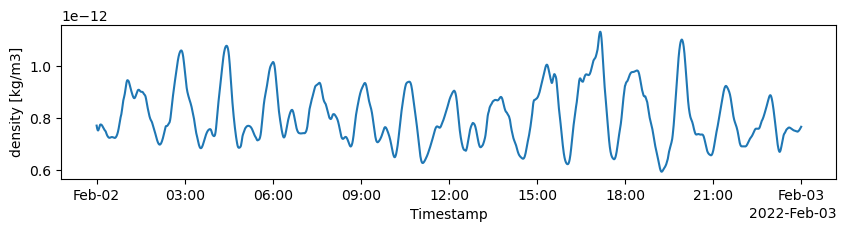

In [9]:
# Use Swarm-C dataset, extract one day, and plot density
ds_SwC.sel(Timestamp=slice("2022-02-02", "2022-02-02"))["density"].plot.line(figsize=(10, 2));

You can check which source products have been accessed:

In [10]:
ds_SwC.attrs["Sources"]

['SW_OPER_AUXCORBCNT_20131122T132146_20240921T233031_0001',
 'SW_OPER_DNSCPOD_2__20220201T000000_20220201T235930_0201',
 'SW_OPER_DNSCPOD_2__20220202T000000_20220202T235930_0201',
 'SW_OPER_DNSCPOD_2__20220203T000000_20220203T235930_0201',
 'SW_OPER_DNSCPOD_2__20220204T000000_20220204T235930_0201',
 'SW_OPER_DNSCPOD_2__20220205T000000_20220205T235930_0201',
 'SW_OPER_DNSCPOD_2__20220206T000000_20220206T235930_0201',
 'SW_OPER_DNSCPOD_2__20220207T000000_20220207T235930_0201',
 'SW_OPER_MODC_SC_1B_20220131T000000_20220131T235959_0504',
 'SW_OPER_MODC_SC_1B_20220201T000000_20220201T235959_0504',
 'SW_OPER_MODC_SC_1B_20220202T000000_20220202T235959_0504',
 'SW_OPER_MODC_SC_1B_20220203T000000_20220203T235959_0504',
 'SW_OPER_MODC_SC_1B_20220204T000000_20220204T235959_0504',
 'SW_OPER_MODC_SC_1B_20220205T000000_20220205T235959_0504',
 'SW_OPER_MODC_SC_1B_20220206T000000_20220206T235959_0504',
 'SW_OPER_MODC_SC_1B_20220207T000000_20220207T235959_0504']

## Visualisation example

Let's try to display the density data as a function of time and latitude...

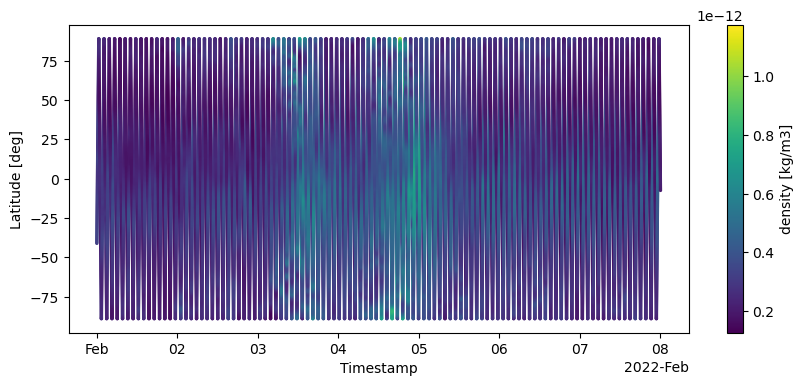

In [11]:
ds_GF1.plot.scatter(x="Timestamp", y="Latitude", hue="density", s=2, edgecolors="face", figsize=(10, 4));

Now let's explore that a bit more to have more control over the figure

In [12]:
def select_north(ds):
    return ds.where(ds["Latitude"] > 0, drop=True)

def select_south(ds):
    return ds.where(ds["Latitude"] < 0, drop=True)

def select_ascending(ds):
    return ds.where(ds["OrbitDirection"] == 1, drop=True)

def select_descending(ds):
    return ds.where(ds["OrbitDirection"] == -1, drop=True)

def get_times_at_orbits(ds, orbitnos: list):
    da = ds["OrbitNumber"]
    t = []
    for orbitno in orbitnos:
        try:
            _t = da.where(da == orbitno, drop=True).isel({"Timestamp": 0})["Timestamp"].values.astype("datetime64[s]").astype(dt.datetime)
        except IndexError:
            _t = None
        t.append(_t)
    return t

def get_orbits_at_times(ds, times: list):
    da = ds["OrbitNumber"]
    return list(da.sel(Timestamp=times, method="nearest").values.astype(int))

In [13]:
norm_gf =  mpl.colors.Normalize(vmin=0, vmax=7.5e-13)
norm_sw = mpl.colors.Normalize(vmin=0, vmax=20e-13)

def plot_density(ds=ds_GF1, norm=norm_gf, title="GRACE-FO 1"):
    
    cmap = "viridis"
    plot_kwargs = {"norm": norm, "edgecolors": None, "s": 2, "marker": "s", "cmap": cmap}
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
    # Plot the four segments of each orbit in sequence
    # North
    _ds = select_ascending(select_north(ds))
    axes[0].scatter(x=_ds["OrbitNumber"], y=_ds["Latitude"], c=_ds["density"], **plot_kwargs)
    _ds = select_descending(select_north(ds))
    axes[0].scatter(x=_ds["OrbitNumber"]+.5, y=_ds["Latitude"], c=_ds["density"], **plot_kwargs)
    # South
    _ds = select_descending(select_south(ds))
    axes[1].scatter(x=_ds["OrbitNumber"]+0.5, y=_ds["Latitude"], c=_ds["density"], **plot_kwargs)
    _ds = select_ascending(select_south(ds))
    axes[1].scatter(x=_ds["OrbitNumber"]+1.0, y=_ds["Latitude"], c=_ds["density"], **plot_kwargs)
    # Adjust axes
    axes[0].set_ylim(0, 90)
    axes[1].set_ylim(-90, 0)
    fig.subplots_adjust(hspace=0)
    axes[1].set_ylabel("Latitude")
    # axes[0].set_backgr
    fig.suptitle(title)
    # Move xticks to align with day starts
    t_start_end = ds["Timestamp"].isel(Timestamp=[0, -1]).values.astype("datetime64[s]").astype(dt.datetime)
    times_to_mark = pd.date_range(start=t_start_end[0], end=t_start_end[1], freq="D")
    orbits_to_mark = get_orbits_at_times(ds, times_to_mark)
    axes[1].set_xticks(orbits_to_mark)
    # Replace orbit numbers with the times
    times_formatted = [_t.strftime("%Y-%m-%d") for _t in times_to_mark]
    axes[1].set_xticklabels(times_formatted)
    # Add colorbar
    cbar_ax = fig.add_axes([0.95, 0.3, 0.01, 0.4])
    sm = mpl.cm.ScalarMappable(cmap=plot_kwargs["cmap"], norm=plot_kwargs["norm"])
    sm.set_array([])
    cb = fig.colorbar(sm, cax=cbar_ax)
    cb.set_label("density [kg m$^{-3}$]")

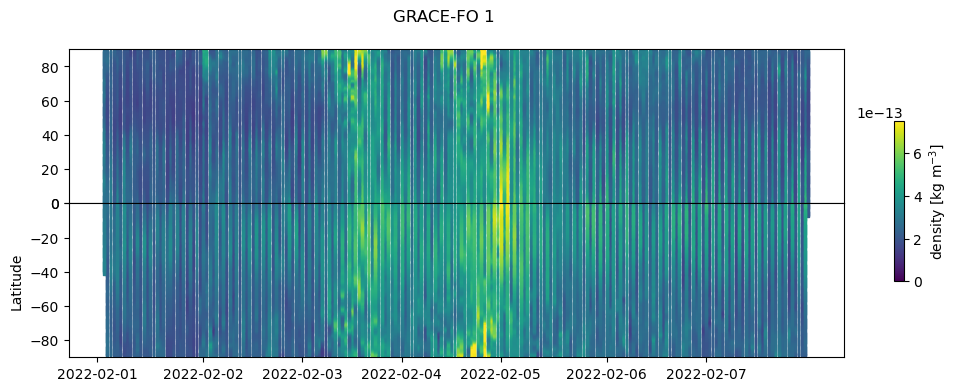

In [14]:
plot_density(ds_GF1, norm_gf, "GRACE-FO 1")

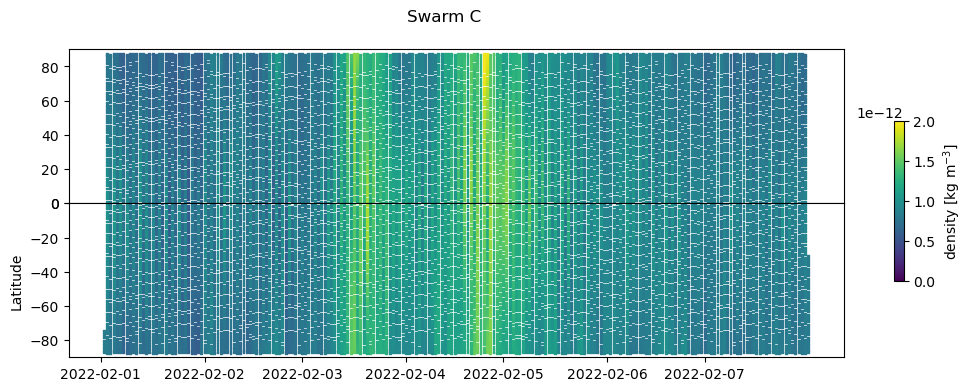

In [15]:
plot_density(ds_SwC, norm_sw, "Swarm C")